In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/naive_bayes_data.csv')

In [ ]:
def get_col_vals_dict(df, col):
  col_vals_dict = {}
  col_vals_unique = list(set(df[col]))

  for idx,val in enumerate(col_vals_unique):
    col_vals_dict[val] = idx

  return col_vals_dict

In [ ]:
def get_examples(df, preprocess=False):
  #preprocess makes all string values into int, for classification
  X = []
  y = []

  cols = list(df.columns)
  attr_cols = cols[:-1]
  result_cols = cols[-1]

  num_rows = len(df)

  for i in range(num_rows):
    new_X = []
    for col in attr_cols:
      if preprocess:
        col_vals_dict = get_col_vals_dict(df, col)
        new_X.append(col_vals_dict[df.iloc[i][col]])
      else:
        new_X.append(df.iloc[i][col])
    X.append(new_X)
    if preprocess:
      col_vals_dict = get_col_vals_dict(df, result_cols)
      y.append(col_vals_dict[df.iloc[i][result_cols]])
    else:
      y.append(df.iloc[i][result_cols])
  
  return X, y

In [ ]:
X, y = get_examples(df, preprocess=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DT

In [ ]:
dt = DT(criterion='entropy')

In [ ]:
model = dt.fit(X_train, y_train)

In [ ]:
preds = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


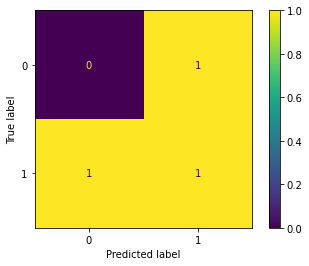

In [ ]:
plot_confusion_matrix(model, X_test, y_test)
plt.show()